# Week 7 - Latent Computations and Information Geometry

## 7.1 - Spherical metric 
Let $x_1 \in(0, \pi)$ and $x_2 \in(0,2 \pi)$ be the latent coordinates of the manifold spanned by the function $f:(0, \pi) \times(0,2 \pi) \rightarrow \mathbb{R}^3$
\begin{align*}
f\left(x_1, x_2\right)=\left(\begin{array}{c}
\sin \left(x_1\right) \cos \left(x_2\right) \\
\sin \left(x_1\right) \sin \left(x_2\right) \\
\cos \left(x_1\right)
\end{array}\right) .
\end{align*}

This will span the unit sphere. 

Let's first plot the manifold of function `f`

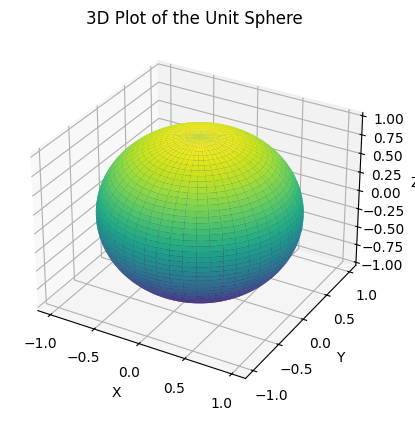

In [10]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

def f(x1:NDArray[np.float64], x2:NDArray[np.float64]) -> NDArray[np.float64]:
    return np.array([np.sin(x1)*np.cos(x2),
                    np.sin(x1)*np.sin(x2),
                    np.cos(x1)])

# Generate a meshgrid for the angles
x1 = np.linspace(0, np.pi, 100)  # Polar angle
x2 = np.linspace(0, 2*np.pi, 100)  # Azimuthal angle
x1, x2 = np.meshgrid(x1, x2)

# Compute cartesian coordinates
x, y, z = f(x1, x2)

# Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Plot of the Unit Sphere')

plt.show()

The metric in latent coordinates is
\begin{align*}
\mathbf{G}_{\mathbf{x}}=\left(\begin{array}{cc}
1 & 0 \\
0 & \sin ^2\left(x_1\right)
\end{array}\right)
\end{align*}

### 1. Derive the volume measure of the metric $G_x$

The volume is defined as

$$
V(x)=\sqrt{\operatorname{det}(G)}
$$

Where the determinant $\operatorname{det}\left(G_{x}\right)$ is the product of the eigenvalues obtained from the eigen decomposition

$$
G_{x}=J_{x}^{T} J_{x}=V_{x} S_{x}^{T} S_{x} V_{x}^{T}
$$

Where $S_{x}^{T} S_{x}$ is a square matrix that holds the eigenvalues.

We can calculate the determinant

$$
\operatorname{det}\left(G_{x}\right)=\sin ^{2}\left(x_{1}\right)
$$

Using the formula of the determinant for a $2 \times 2$ matrix $M=\left[\begin{array}{ll}a & b \\ c & d\end{array}\right]$

$$
\operatorname{det}(M)=a d-b c
$$

Now we can obtain the volume measure as

$$
V(x)=\sqrt{\operatorname{det}\left(G_{x}\right)}=\sin \left(x_{1}\right)
$$



### 2. Integrate 
Integrate the function $h\left(x_1, x_2\right)=x_2 \sin \left(x_1\right)$ with respect to the volume measure, i.e. compute $\int_0^\pi \int_0^{2 \pi} h\left(x_1, x_2\right) \mathrm{d} \mathcal{M}\left(x_1, x_2\right)$.

We use the fact that:
$$
\int_{\mathcal{X}} h(f(\mathbf{x})) \sqrt{\operatorname{det}\left(\mathbf{G}_{\mathbf{x}}\right)} \mathrm{d} \mathbf{x}=\int_{\mathcal{X}} h(f(\mathbf{x})) \mathrm{d} \mathcal{M}(\mathbf{x})
$$
Where $\mathcal{X}$ is the region of the manifold over which we want to intergrate.

And so we have that

$$
\begin{align}
    \int_0^\pi \int_0^{2 \pi} h\left(x_1, x_2\right) \mathrm{d} \mathcal{M}\left(x_1, x_2\right) 
    &= \int_0^\pi \int_0^{2 \pi} h\left(x_1, x_2\right) \sin(x_1) \mathrm{d}\mathbf{x}_2 \mathrm{d}\mathbf{x}_1\\
    &= \int_0^\pi \int_0^{2 \pi} x_2 \sin^2(x_1)\mathrm{d}\mathbf{x}_2 \mathrm{d}\mathbf{x}_1\\
    &= \int_{0}^{\pi} \int_{0}^{2 \pi} x_{2} \sin ^{2}\left(x_{1}\right) d x_{2} d x_{1} \\
    &= \int_{0}^{\pi}\left[\frac{1}{2} x_{2}^{2} \sin ^{2}\left(x_{1}\right)\right]_{0}^{2 \pi} d x_{1} \\
    &= \int_{0}^{\pi} \frac{1}{2} 4 \pi^{2} \sin ^{2}\left(x_{1}\right) d x_{1} \\
    &= 2 \pi^{2}\left[\frac{1}{2}\left(x-\frac{1}{2} \sin (2 x)\right)\right]_{0}^{\pi} \\
    &= 2 \pi^{2}\left(\frac{1}{2} \pi-0\right) \\
    &= \pi^{3}
\end{align}
$$

### 3. Numerical estimation
Write a computer program to numerically estimate the value of the integral

In [15]:
import time
import numpy as np
from mamll.diffgeom.integral import integral_2d, integral_2d_vectorized

def f(x1, x2):
    return x2*np.power(np.sin(x1), 2)

x1_range = (0, np.pi)
x2_range = (0, 2*np.pi)

t1 = time.time()
solution_2d = integral_2d(f, x1_range, x2_range, N=1000)
t2 = time.time()

t3 = time.time()
solution_2d_vectorized = integral_2d_vectorized(f, x1_range, x2_range, N=1000)
t4 = time.time()

print(f"Non-vectorized integral: {solution_2d}")
print(f"Time taken for non-vectorized integral: {t2-t1}")
print(f"Vectorized integral: {solution_2d_vectorized}")
print(f"Time taken for vectorized integral: {t4-t3}")

Non-vectorized integral: 31.037313994295026
Time taken for non-vectorized integral: 2.456085681915283
Vectorized integral: 31.03731399429411
Time taken for vectorized integral: 0.03554797172546387


## 7.2 - Quadratic metric

Consider a two-dimensional abstract manifold with the metric
\begin{align*}
\mathbf{G}_{\mathbf{x}}=\left(1+\|\mathbf{x}\|^2\right) \mathbf{I}, \quad \mathbf{x} \in \mathbb{R}^2 .
\end{align*}

### 1. Derive the volume measure of the metric.

We have the metric

$$
\begin{aligned}
G_{x} & =\left(1+\|x\|^{2}\right) I \\
& =\left[\begin{array}{cc}
1+\|x\|^{2} & 0 \\
0 & 1+\|x\|^{2}
\end{array}\right] \\
& =\left[\begin{array}{cc}
1+x_1^{2} + x_2^2 & 0 \\
0 & 1+x_1^{2} + x_2^2
\end{array}\right]
\end{aligned}
$$

The determinant is

$$
\operatorname{det}\left(G_{x}\right)=\left(1+x_1^{2} + x_2^2\right)^{2}
$$

And so the volume is

$$
\begin{aligned}
V(x) & =\sqrt{\operatorname{det}\left(G_{x}\right)} \\
&= 1+x_1^{2} + x_2^2
\end{aligned}
$$



### 2. Integrate 
Integrate the function $h\left(x_1, x_2\right)=x_1$ with respect to the volume measure over the set $[-1,1]^2$, i.e. compute $\int_{-1}^1 \int_{-1}^1 h\left(x_1, x_2\right) \mathrm{d} \mathcal{M}\left(x_1, x_2\right)$.

$$
\begin{aligned}
\int_{-1}^1 \int_{-1}^1 h\left(x_1, x_2\right) \mathrm{d} \mathcal{M}\left(x_1, x_2\right)
&= \int_{-1}^{1} \int_{-1}^{1} x_{1}\left(1+x_{1}^{2}+x_{2}^{2}\right) d x_{2} d x_{1} \\
&= \int_{-1}^{1} x_{1}\left[1+x_{1}^{2}+\frac{1}{3} x_{2}^{3}\right]_{-1}^{1} d x_{1} \\
&= \int_{-1}^{1} x_{1}\left(\left(1+x_{1}^{2}+\frac{1}{3}\right)-\left(1+x_{1}^{2}-\frac{1}{3}\right)\right) d x_{1} \\
&= \int_{-1}^{1} 2 x_{1}^{3} d x_{1} \\
&= {\left[\frac{1}{2} x_{1}^{4}\right]_{-1}^{1} } \\
&= 0
\end{aligned}
$$



### 3. Numerical Estimation 
Write a computer program to numerically estimate the value of the integral.

In [16]:
from mamll.diffgeom.integral import integral_2d_vectorized

def f(x1, x2):
    return x1*(1 + np.power(x1,2) + np.power(x2,2))

x1_range = (-1,1)
x2_range = (-1,1)

solution_2d_vectorized = integral_2d_vectorized(f, x1_range, x2_range, N=1000)
print(f"Vectorized integral: {solution_2d_vectorized}")

Vectorized integral: 6.360988634655716e-16


The estimation is `e-16`, so basically 0.

## 7.3 - Metric of randomly projected manifold
Consider the manifold spanned by the mapping $f: \mathbb{R}^d \rightarrow \mathbb{R}^{2 D}$ defined as
\begin{align*}
h(\mathbf{x})=\left(\begin{array}{c}
f(\mathbf{x}) \\
\sigma(\mathbf{x}) .
\end{array}\right)
\end{align*}

### 1. Derive the pullback metric of the manifold.

The pullback metric, in general, measures how the geometry of the target space (in this case, $\mathbb{R}^{2D}$) induces a geometry on the domain space ($\mathbb{R}^d$) through the mapping $h$. To compute it, we consider the differential $dh(\mathbf{x})$, which maps tangent vectors from the domain space to tangent vectors in the target space, effectively describing how local changes in $\mathbb{R}^d$ result in local changes in $\mathbb{R}^{2D}$.

For $h(\mathbf{x})$, the differential can be represented as the Jacobian matrix of $h$, which is a block matrix composed of the Jacobian of $f(\mathbf{x})$ and $\sigma(\mathbf{x})$:
$$
J_h(\mathbf{x}) = \left( \begin{array}{c}
J_f(\mathbf{x}) \\
J_\sigma(\mathbf{x})
\end{array} \right).
$$

The pullback metric at $\mathbf{x}$ is then given by the product of this Jacobian and its transpose:
$$
G_h(\mathbf{x}) = J_h(\mathbf{x})^\top J_h(\mathbf{x}) = J_f(\mathbf{x})^\top J_f(\mathbf{x}) + J_\sigma(\mathbf{x})^\top J_\sigma(\mathbf{x}).
$$

Where 
\begin{align*}
J_h(\mathbf{x})^{\top} J_h(\mathbf{x})=\left(J_f(\mathbf{x})^{\top}, J_\sigma(\mathbf{x})^{\top}\right)\left(\begin{array}{c}
J_f(\mathbf{x}) \\
J_\sigma(\mathbf{x})
\end{array}\right),
\end{align*}

This result demonstrates how both the geometry of $f(\mathbf{x})$ and the uncertainty $\sigma(\mathbf{x})$ contribute to the induced geometry on $\mathbb{R}^d$. Notably, the inclusion of $\sigma(\mathbf{x})$ allows this metric to account for variability or uncertainty in the data represented by the manifold, as opposed to a metric derived solely from $f(\mathbf{x})$.

## Exercise 7.4 - Choice of parametrization

Consider two normal distributions
\begin{align*}
\mathcal{N}_1=\mathcal{N}\left(\mu_1, \sigma_1^2\right) \quad \text { and } \quad \mathcal{N}_2=\mathcal{N}\left(\mu_2, \sigma_2^2\right),
\end{align*}
where
\begin{align*}
\mu_1=0, \quad \mu_2=1, \quad \sigma_1=1, \quad \sigma_2=2 .
\end{align*}

and
$$
\mathcal{N}(\mu, \sigma) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$


### 1. Euclidean distance
Compute the Euclidean distance between these distributions in the following parametrizations
\begin{align*}
\begin{aligned}
& \theta=(\mu, \sigma) \\
& \theta=\left(\mu, \sigma^2\right) \\
& \theta=\left(\mu, \sigma^{-2}\right) \\
& \theta=\left(\frac{\mu}{\sigma^2},-\frac{1}{2 \sigma^2}\right) .
\end{aligned}
\end{align*}

In [17]:
import numpy as np

mu = np.array([0, 1])
sigma = np.array([1, 2])

# Gaussian distribution

### 2. Choice of parametrization 
Does one parametrization seem more natural (or better) than another (this question is open-ended)?

### 3. - Find parametrization 
Find parametrization of normal distributions such that the associated pullback metric corresponds to that of the randomly projected manifold (Eq. 12.8 in the DGGM book).